<h1><center>SAE INTRO CYBER SECURITE : </h1></center>

FERNANDES Mathias
<br>
KHAJNANE Mohamed

***

<div class="alert alert-block alert-info bilan">
Objectif : Intercepter une communication FTP entre un ordinateur et un serveur pour déchiffrer des informations telles que le mot de passe et le nom d'utilisateur du client, et les ports utilisés. (et sauver la planète ANDO au passage)
</div>

***

## Capture wireshark du McDiarmid.pcapng :

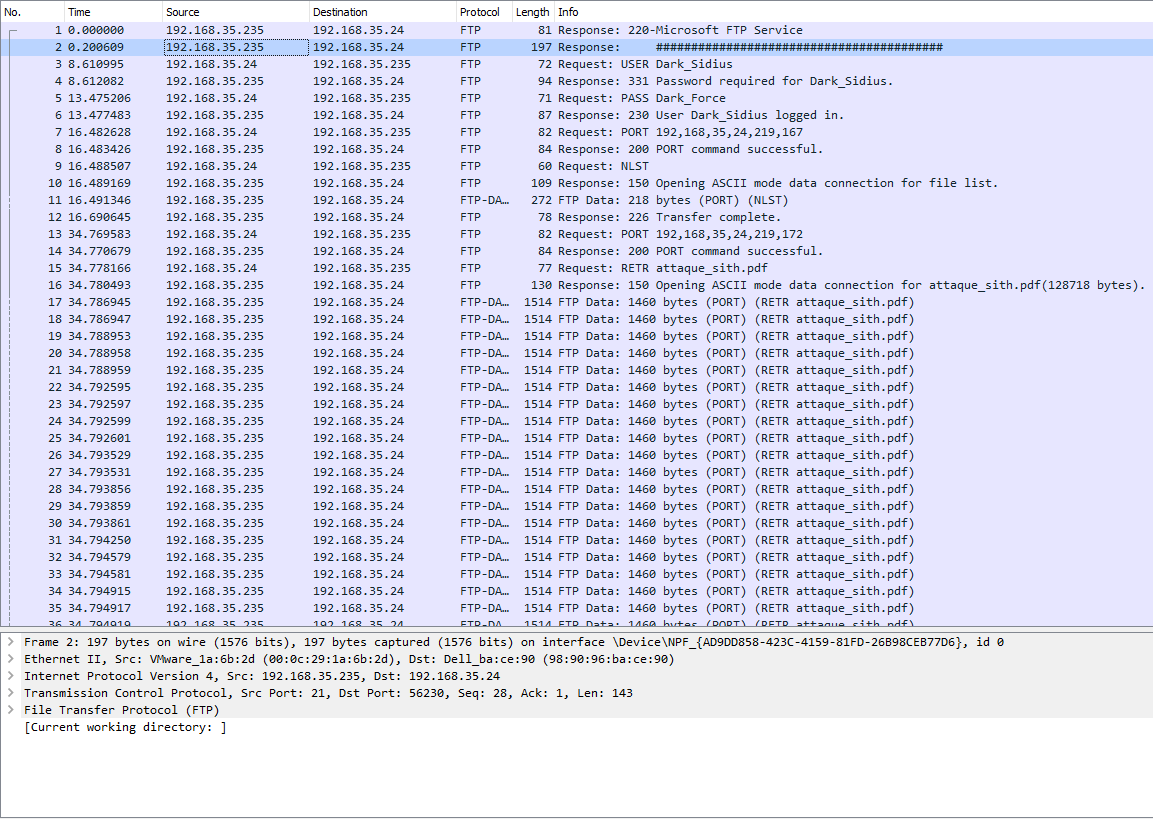

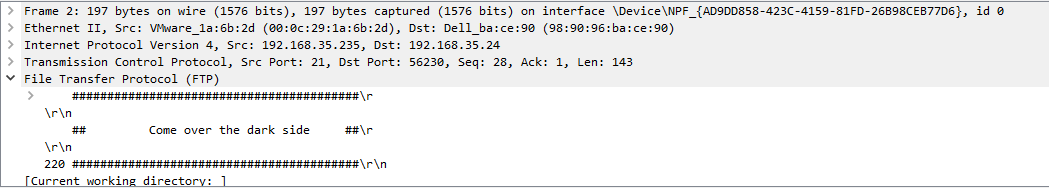

***

## Analyse de la capture 

Le protocole utilisé pour l'envoi de ce fichier est le `protocole FTP` 

Adresse IP client : `192.168.35.24`
<br>
Adresse IP serveur : `192.168.35.235`

Le protocole de transport utilisé par le protocole applicatif FTP est le `protocole TCP`. Le numéro de port associé est `20`.

Le message de bienvenue de ce site est `"come over the dark side"`

USER : `Dark_Sidius` -> `trame 3 `
<br>
PASSWORD : `Dark_Force` -> `trame 5 `

Le message Request : `PORT, 192.168.35.24, 219, 172`. Indique sur quelle adresse ip envoyer les données.
<br>
L'adresse IP est donné en `décimal`, mais le numéro de port est 6ème valeur (p1) fois 256 + la 6ème valeur (p2)

Le mode utilisé ici est le mode `actif`, car c'est le client qui détermine le port utilisé. Comme on peut le voir sur la capture ligne 13.

Il y a 2 transfert de données sur la capture, les données transferés sont des `FTP-Data` et elles sont initilisées avec les commandes `NSLT` et `RETR`.

Le fichier transmis est `attaque_sith.pdf`, il contient `128718 bytes`, 88 paquets sont transmis de `1460 bytes`.

Le message de fin de transfert est : `Tranfert Complete`.

***

## Mise en place du serveur FileZilla

Pour mettre en place le serveur FileZilla, il fallait dans un premier temps utiliser un ordinateur qui était l'hôte et un ordinateur qui était le client. 
Pour ce faire, sur le pc que l'on souhaitait utiliser comme client, il fallait rentrer l'adresse IP du hôte, un nom d'utilisateur et un mot de passe. 
<br>
Dans notre exemple, on a utilisé : 

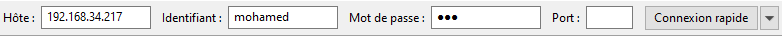

On a également utilisé le mode de transfert Actif, et la connection FTP simple et non sécurisée.

Et pour l'hôte, on a laissé l'IP du serveur de base : 127.0.0.1

***

## Récupération du login et du mot de passe 

Ici, on cherche à récupérer le nom d'utilisateur et le mot de passe que l'on peut trouver sur la capture wireshark d'un échange de trame FTP.

### A quoi sert scapy :

<div class="alert alert-block alert-info bilan">
Scapy : permet de manipuler (analyse, envoi, recevoir) des paquets réseaux. 
</div>

### Non automatique :

In [10]:
#Importation de la librairie scapy et ouverture et lecture du fichier McDiarmid.pcapng
from scapy.all import *
paquets = rdpcap("McDiarmid.pcapng")    #rdpcap sert à lire le fichier

In [29]:
paquets[2][Raw].load

b'USER Dark_Sidius\r\n'

In [30]:
paquets[2][Raw].load.split(sep=None)

[b'USER', b'Dark_Sidius']

In [31]:
paquets[4][Raw].load.split(sep=None)

[b'PASS', b'Dark_Force']

In [32]:
paquets[2][Raw].load.split(sep=None)[0]

b'USER'

In [33]:
paquets[4][Raw].load.split(sep=None)[0]

b'PASS'

In [28]:
paquets[2][Raw].load.split(sep=None), paquets[4][Raw].load.split(sep=None)

([b'USER', b'Dark_Sidius'], [b'PASS', b'Dark_Force'])

### Automatique :

In [15]:
paquets2 = rdpcap("McDiarmid.pcapng")
for pkt in paquets2:
    if pkt[Raw].load.split(sep=None)[0] == b 'USER':
        print("le nom d'utilisateur est : ",pkt[Raw].load.split(sep=None)[1])
    elif pkt[Raw].load.split(sep=None)[0] == b'PASS':
        print("le mot de passe est : ",pkt[Raw].load.split(sep=None)[1])

le nom d'utilisateur est :  b'Dark_Sidius'
le mot de passe est :  b'Dark_Force'


***

## Récupération du fichier transmis à partir du numéro de port TCP et décodage du message chiffré

On utilise le numéro de port. Ansi, on voit que sur notre capture wireshark que le numéro de port de la communication FTP-data a toujours le même port : le port 20.
Ainsi, il suffit de créer un programme qui vérifie si le numéro de port d'un élément correspond à 20.

In [7]:
fichier = open("Desktop\SW2.txt", "wb")
for i in range(len(paquets2)-1):
    if paquets2[i][TCP].sport == 20:
        fichier.write(bytes(paquets2[i][Raw]))   

Le jedi recherché par Dark Sidius est Maitre Guillemin : 
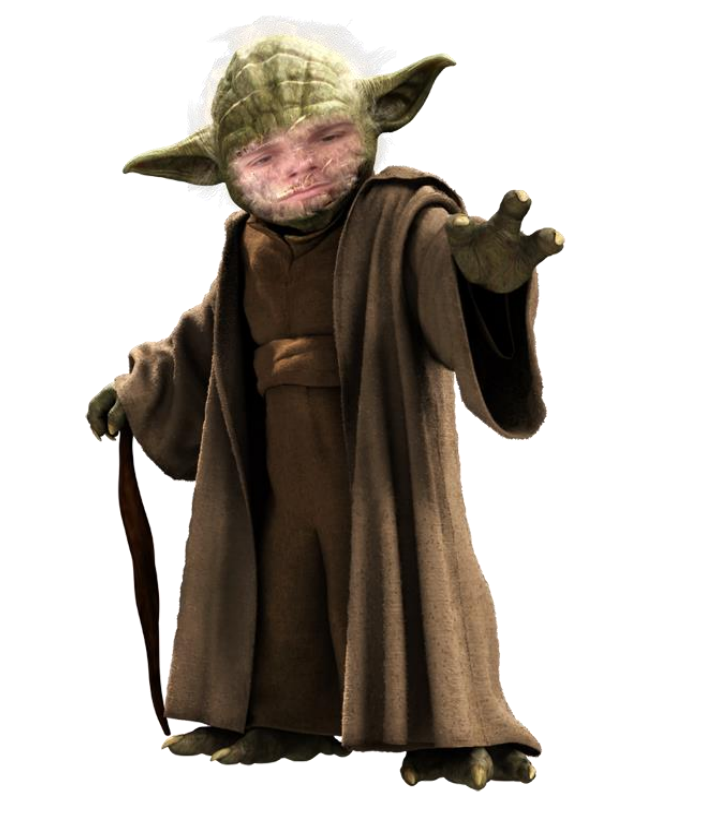

***

## Décodage du message trouvé sur le PDF.

On crée un dictionnaire qui contiendra chacune des lettres et leurs substitus par le chiffrement donné dans le document de cadrage. Ansi, on aura un rapport clé / valeur qui nous permettra plus tard dans le code de changer chacunes des lettres du message. 
<br>
On crée également une variable qui contiendra tout le message codé sous forme de chaine de caractères. 

On analyse ensuite si les valeurs de la chaine de char message est dans les clés du dictionnaire.


In [41]:
changement = {'W' : 'A', 'S' : 'B', 'E' : 'C', 'R' : 'D', 'D': 'E', 'X' : 'F', 'C': 'G', 'F' : 'H', 'T' : 'I', 'Y' : 'J'
             , 'G' : 'K', 'V' : 'L', 'B' : 'M', 'H' : 'N', 'U' : 'O', 'N' : 'P', 'J' : 'Q', 'I' : 'R', 'O' : 'S',
              'K' : 'T', 'L' : 'U', 'M' : 'V', 'P' : 'W', 'A' : 'X', 'Z' : 'Y', 'Q' : 'Z'}
fichier = open("SW2.pdf","rb")
chaine = ''
message = "RWIG OTRTULO HULO RDMUHO DEIWODI VDO YDRT DK KULKDO VDO NDIOUHHDO JLT VDO OLNNUIKDHK. TV DOK KDBNO RD XIWNNDI LH CIWHR EULN DK XWTID EUBNIDHRID W HUO DHHDBTO JL'TVO RUTMDHK OD OULBDKKID W HUKID NLTOOWHED.IDYUTHO HUKID XVUKKD RWHO VD OZOKDBD RD VW SUIRLID BDRTWHD RWHO KIUTO YULIO DK BDHD LHD WKKWJLD EUHKID VW NVWHDKD WHRU. TV HD RUTK NVLO IDOKDI WLELH OLIMTMWHK OLI EDKKD NVWHDKD DK VW IWED WJLWVTOF RUTK RTONWIWTKID.RD NVLO VD YDRT RUHK YD KD YUTHO VW NFUKU DOK LH YDRT I&K. TV W RDO JLWVTKDO DAEDNKTUHHDVVDO NULI V'THKDIEDNKTUH RDO EUBBLHTEWKTUHO. KL RUTO VD KLDI.OUTO OWHO NTKTD.RWIG NVWCDLTO"

for i in range (len(message)):
    if message[i] in changement.keys():
        chaine = chaine + changement[message[i]]
    else:
        chaine = chaine + message[i]
for i in range (len(chaine)):
    print (chaine[i], end="")

DARK SIDIOUS NOUS DEVONS ECRASER LES JEDI ET TOUTES LES PERSONNES QUI LES SUPPORTENT. IL EST TEMPS DE FRAPPER UN GRAND COUP ET FAIRE COMPRENDRE A NOS ENNEMIS QU'ILS DOIVENT SE SOUMETTRE A NOTRE PUISSANCE.REJOINS NOTRE FLOTTE DANS LE SYSTEME DE LA BORDURE MEDIANE DANS TROIS JOURS ET MENE UNE ATTAQUE CONTRE LA PLANETE ANDO. IL NE DOIT PLUS RESTER AUCUN SURVIVANT SUR CETTE PLANETE ET LA RACE AQUALISH DOIT DISPARAITRE.DE PLUS LE JEDI DONT JE TE JOINS LA PHOTO EST UN JEDI R&T. IL A DES QUALITES EXCEPTIONNELLES POUR L'INTERCEPTION DES COMMUNICATIONS. TU DOIS LE TUER.SOIS SANS PITIE.DARK PLAGEUIS

***

## Récupération automatique du numéro de port TCP négocié pour le transfert et du fichier

### Non automatique :

In [44]:
paquets=rdpcap("McDiarmid.pcapng")
a=paquets[12][Raw].load.decode('UTF8').split(sep=',')[4]
b=paquets[12][Raw].load.decode('UTF8').split(sep=',')[5]
pn = (int(a)*256)+int(b)
print(pn)
nom=paquets[14][Raw].load.decode('UTF8').split(sep=None)[1]
print(nom)

56236
attaque_sith.pdf


### Automatique :

In [10]:
np = rdpcap ("McDiarmid.pcapng")
fichier = open("fichier.pdf","ab")
for ports in np:
    if 'PORT' in str(ports[Raw]. load.split (sep=None)) and ports [TCP].dport == 21:
        lst_ports = ports[Raw]. load.decode( "UTF8" ).split(" ") [1].split(",")
        port_dyn = int(lst_ports[4]) * 256 + int(lst_ports[5].replace("\r\n",""))
    if 'RETR' in str(ports[Raw].load.split(sep=None)) :
        print(str(ports[Raw].load.split(sep=None)[1].decode('UTF8')))
    if ports[TCP].sport == 20:
        fichier.write(bytes(ports[Raw]))
fichier.close()
print (port_dyn)

attaque_sith.pdf
56236


***

## L'utilisation de sniff

La fonction sniff(filter="", prn=None) permet de capturer le trafic réseau à partir d'une ou plusieurs interfaces. 
filter permet de filtrer les trames reçues avec des chaines de caractères. Par exemple, ici on a utilisé filter pour obtenir les trames possédant les champs tcp, port 20 et 21. 
Le champ prn permet de préciser la fonction à sniffer. 


***

In [ ]:
from scapy.all import *


def login(paquets):
    if paquets.haslayer(Raw):
        if (paquets[Raw].load.split(sep=None)[0]).decode('UTF8') == 'USER':
            a = paquets[Raw].load.split(sep=None)[1].decode('UTF8')
            print(a)
        if (paquets[Raw].load.split(sep=None)[0]).decode('UTF8') == 'PASS':
            b = paquets[Raw].load.split(sep=None)[1].decode('UTF8')
            print(b)
    pass



def ports(paquets):
    if paquets.haslayer(Raw):
        if 'PORT' in paquets[Raw].load.split(sep=None)[0].decode("UTF8"):
            lst_ports = (paquets[Raw].load.split(sep=None)[1].decode("UTF8")).split(",")
            port_dyn = int(lst_ports[-2]) * 256 + int(lst_ports[-1].replace("\r\n", ""))
            print(port_dyn)
        if 'RETR' in str(paquets[Raw].load.split(sep=None)):
            print(str(paquets[Raw].load.split(sep=None)[1].decode('UTF8')))

def allsniff(paquets):
    (login(paquets))
    (ports(paquets))

sniff(prn=allsniff, filter='tcp port 20 or 21')

Voici les résultats des codes précédents, qui affichent le nom d'utilisateur du client du serveur FTP, le mot de passe, les ports utilisés pour l'installation des fichiers déposés sur le serveur par l'hote par le client et le nom du fichier. 

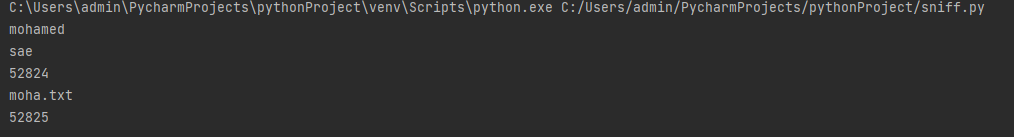

***

### Attaque MITM (Man-in-the-middle)

Une attaque man in the middle consiste à intercepter une communication entre 2 systemes et voler les données  

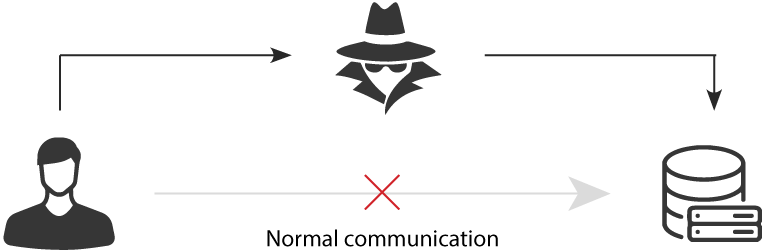

### PS : McDiarmid est Dark Sidious.

***

###### Cellule html à executer pour la mise en page du notebook

In [1]:
# Code html pour mise en page du notebook
from IPython.core.display import HTML

styles = "<style>\n.travail {\n  background-size: 30px;\n   ;\n    background-position: left top;\n    background-repeat: no-repeat;\n    padding-left: 40px;\n}\n</style>"
HTML(styles)